In [92]:
!ls

CONTRIBUTING.md
LICENSE.md
README.md
TEMPLATE_README.md
awesome.gif
bom.movie_gross.csv
student.ipynb
title.akas.csv
title.basics.csv
title.ratings.csv
untitled
zippedData


# Exploring Movie Gross Earnings, Ratings, and Genre Trends
 
 Authors Celestine A. Imelda

## Overview 

The project titled "Exploring Movie Gross Earnings, Ratings, and Genre Trends" aims to analyze and uncover insights from three datasets: bom.movie_gross.csv, title.basics.csv, and title.ratings.csv. The investigation will revolve around the financial performance of movies, shedding light on their gross earnings. Additionally, the project will delve into movie ratings, considering both audience and critic scores, to understand how public perception correlates with financial success. Moreover, an examination of movie genres will be conducted to identify trends and patterns, exploring which genres tend to thrive in the ever-evolving movie industry. Through this comprehensive analysis, the project seeks to provide valuable insights into the relationships between movie earnings, ratings, and genre preferences, contributing to a deeper understanding of the factors that drive success in the film business.





## Business Problem

The movie industry is highly competitive, and production studios invest substantial resources in creating and marketing films. However, not all movies achieve significant box office success. Understanding the key factors that influence a movie's revenue and audience appeal is crucial for production companies aiming to maximize their return on investment.

By analyzing the `bom.movie_gross.csv`, `title.basics.csv`, and `title.ratings.csv` datasets, the project can identify trends and patterns that contribute to successful box office performances. The analysis will reveal which genres, release timings, or movie attributes are more likely to resonate with audiences and receive higher ratings. Furthermore, exploring the correlation between audience ratings and financial performance can help studios gauge the impact of critical acclaim on a film's box office success.

Ultimately, the project's findings can assist production studios and filmmakers in making informed decisions during the movie-making process. Understanding the factors that drive box office success can guide them in choosing profitable genres, crafting appealing narratives, and strategizing effective release dates, thereby increasing the likelihood of achieving higher movie revenue and audience satisfaction.

## Data Understanding 
**Data Description**



In [93]:
import csv 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Exploring the data

In [94]:
data1 = pd.read_csv('bom.movie_gross.csv') #reading a csv file and displaying the first five rows
data1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [95]:
#checking the shape, gives us the numeber of rows and columns in the above dataset
data1.shape

(3387, 5)

In [96]:
#summary of the dataset above giving us the total number of entries, the datatype of every title and also the columns with missing values
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [97]:
data2 = pd.read_csv('title.basics.csv') #reading the second csv file and displaying the first 5 rows
data2.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [98]:
data2.info() #summary of the dataset above giving us the total number of entries, the datatype of every title and also the columns with missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [99]:
data3 = pd.read_csv('title.ratings.csv')
data3.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [100]:
data3.info() #summary of the dataset above giving us the total number of entries, the datatype of every title and also the columns with missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [101]:
data1.isnull().sum() # Getting the sum of the null values in every column in data1

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [102]:
data2.isnull().sum() #Getting the sum of the null values in every column in data2

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [103]:
#finding the sum of the null values in the data3
data3.isnull().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

## Data Preparation

## Data cleaning

For easier working on the datasets to achieve the desired results, i have decided to drop the columns and rows which have more than 80% of missing values and also those that were unnecessary.

In [104]:
data1.dropna(axis=0) #dropping the missing rows

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [105]:
data1.describe() #getting the statical analysis of the data1

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [106]:
data1.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [107]:
# Calculate the mode of the 'foreign_gross' column
mode_replacement = data1['foreign_gross'].mode()[0]

# Fill missing values in the 'foreign_gross' column with the mode
data1_filled = data1.fillna({'foreign_gross': mode_replacement})

# Display the DataFrame after filling missing values
data1_filled
# here we are replacing the missing foreign gross with the mode because we want to work with the column with that of domestic gross to get the total gross revenue

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,1200000,2018
3383,Edward II (2018 re-release),FM,4800.0,1200000,2018
3384,El Pacto,Sony,2500.0,1200000,2018
3385,The Swan,Synergetic,2400.0,1200000,2018


In [108]:
data1_filled.isna().sum()# checking if the null values were filled 

title              0
studio             5
domestic_gross    28
foreign_gross      0
year               0
dtype: int64

In [109]:
data1_filled.dropna(inplace=True) # here we make sure that the dataset is modified after filling the missing values 

In [110]:
data1_filled.isna().sum() #finding the sum of all the missing values

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [111]:
data2.isna().sum()#finding the sum of all the missing values

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [112]:
data2.drop(['runtime_minutes'],axis=1,inplace=True)# here we are dropping the runtime_minutes columns from the second dataset because it has missing values

In [113]:
data2.head()# displaying the first five rows of the second dataset

,tconst,primary_title,original_title,start_year,genres
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy"


In [114]:
data1.head()#displays the first 5 rows of the data1

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [115]:

# Convert 'domestic_gross' and 'foreign_gross' columns to numeric data type
data1['domestic_gross'] = pd.to_numeric(data1['domestic_gross'], errors='coerce')
data1['foreign_gross'] = pd.to_numeric(data1['foreign_gross'], errors='coerce')

# Create the new column 'total_gross_revenue' by summing the 'domestic_gross' and 'foreign_gross' columns
data1['total_gross_revenue'] = data1['domestic_gross'] + data1['foreign_gross']

# Display the updated DataFrame with the new column
data1['total_gross_revenue']

0       1.067000e+09
1       1.025500e+09
2       9.603000e+08
3       8.283000e+08
4       7.526000e+08
            ...     
3382             NaN
3383             NaN
3384             NaN
3385             NaN
3386             NaN
Name: total_gross_revenue, Length: 3387, dtype: float64

In [116]:
data1.head()#displays the first 5 rows of the data1

,title,studio,domestic_gross,foreign_gross,year,total_gross_revenue
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [136]:
# Sort the DataFrame by 'total_gross_revenue' in descending order to get the top 10 movies
top_10_movies = data1.sort_values(by='total_gross_revenue', ascending=False).head(10)
top_10_movies

,title,studio,domestic_gross,foreign_gross,year,total_gross_revenue
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
1127,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09


## Merging Datasets
We are putting the first dataset together with second one to form one dataset that we are going to work with. we merge datasets using one column that is present in both of them. Here we used tconst

In [118]:
Merging_Dataset = pd.merge(data2, data3, on='tconst')
Merging_Dataset

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,6.6,5


In [119]:
Merging_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          73856 non-null  object 
 1   primary_title   73856 non-null  object 
 2   original_title  73856 non-null  object 
 3   start_year      73856 non-null  int64  
 4   genres          73052 non-null  object 
 5   averagerating   73856 non-null  float64
 6   numvotes        73856 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 4.5+ MB


In [121]:
Merging_Dataset.drop_duplicates(inplace=True)
#here we are checking for any duplicate values and getting rid of them.

## Data Modeling 
**Data Modeling Process**

The data modeling process involves analyzing the data to derive insights and answer the data questions posed earlier. The primary goal is to use appropriate statistical to extract meaningful patterns and relationships from the data. We will use;

1. **Exploratory Data Analysis (EDA):** I used the following visualization methods, histograms, scatter plots and box plots to visualize my data.

In [122]:
genre_counts = Merging_Dataset['genres'].value_counts()# getting the genres count
genre_counts

Drama                        11612
Documentary                  10313
Comedy                        5613
Horror                        2692
Comedy,Drama                  2617
                             ...  
Sport,Thriller                   1
Comedy,Sport,Western             1
Action,Music                     1
Comedy,Sci-Fi,Western            1
Documentary,Family,Sci-Fi        1
Name: genres, Length: 923, dtype: int64

In [123]:
top_20_genres = genre_counts.head(20)
top_20_genres

Drama                    11612
Documentary              10313
Comedy                    5613
Horror                    2692
Comedy,Drama              2617
Thriller                  1555
Drama,Romance             1510
Comedy,Romance            1236
Comedy,Drama,Romance      1208
Horror,Thriller           1004
Drama,Thriller             990
Action                     979
Romance                    717
Biography,Documentary      694
Documentary,Drama          582
Documentary,Music          579
Comedy,Horror              579
Action,Crime,Drama         562
Crime,Drama,Thriller       504
Crime,Drama                494
Name: genres, dtype: int64

In [124]:
# Data Processing: Calculate the total number of votes for each genre and arrange them 
genre_votes = Merging_Dataset.groupby('genres')['numvotes'].sum().sort_values(ascending=False)

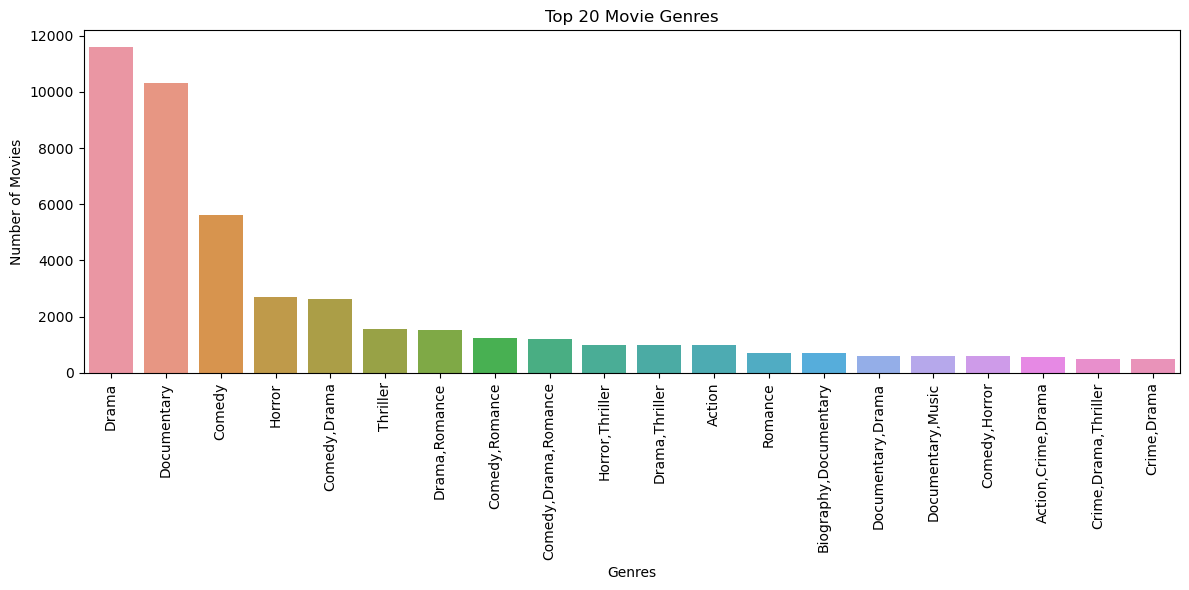

In [125]:
#plotting a graph for the top 20 movie genres

plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_genres.index, y=top_20_genres.values)
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Top 20 Movie Genres')
plt.tight_layout()
plt.show()

the above graph shows Drama genre has the highest number of movies.

In [126]:
genre_votes.value_counts()

6        10
5         8
7         8
17        8
8         7
         ..
34209     1
33755     1
32851     1
32727     1
6511      1
Name: numvotes, Length: 773, dtype: int64

In [127]:
top_20_genres_votes = genre_votes.head(20)
top_20_genres_votes

genres
Action,Adventure,Sci-Fi       23023248
Action,Adventure,Fantasy       9658883
Adventure,Animation,Comedy     8687435
Drama                          8395521
Comedy,Drama,Romance           7665463
Action,Adventure,Comedy        7256686
Comedy                         6832037
Comedy,Drama                   6462839
Action,Crime,Drama             5563553
Drama,Romance                  5542760
Action,Crime,Thriller          4940335
Comedy,Romance                 4752398
Action,Comedy,Crime            4686559
Action,Adventure,Drama         4485443
Action,Thriller                4284464
Horror,Mystery,Thriller        3902882
Drama,Thriller                 3879354
Action,Adventure,Thriller      3748240
Action,Adventure,Animation     3570543
Biography,Drama,History        3502843
Name: numvotes, dtype: int64

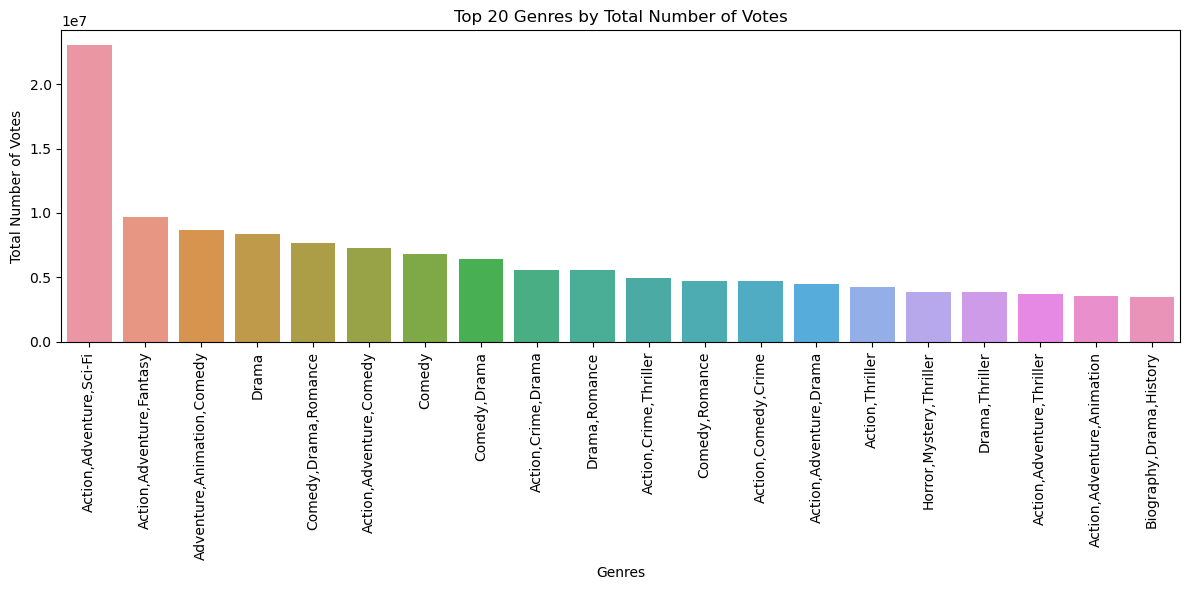

In [128]:
#visualization

plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_genres_votes.index, y=top_20_genres_votes)
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Total Number of Votes')
plt.title('Top 20 Genres by Total Number of Votes')
plt.tight_layout()
plt.show()


the most voted genres is action, adventure , scifi and i think it should be produced more often.

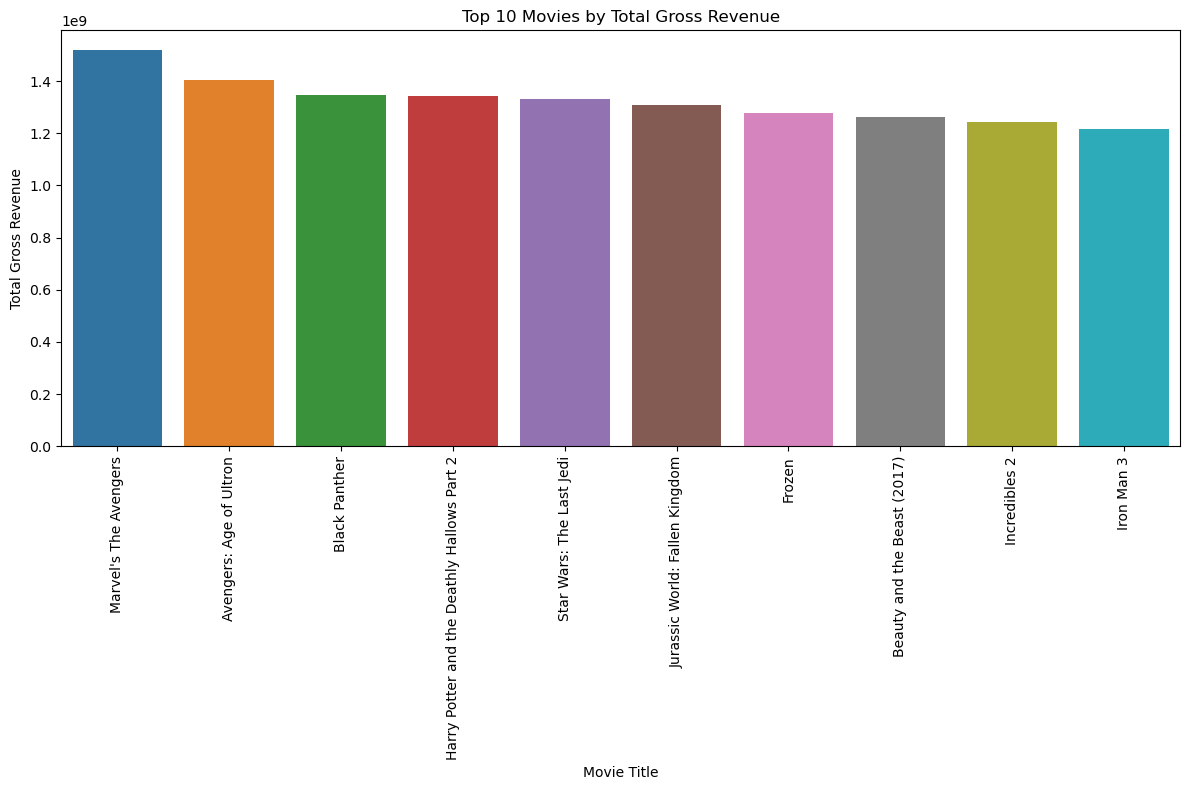

In [129]:

# Sort the DataFrame by 'total_gross_revenue' in descending order to get the top 10 movies
top_10_movies = data1.sort_values(by='total_gross_revenue', ascending=False).head(10)

# Data Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='title', y='total_gross_revenue', data=top_10_movies)
plt.xticks(rotation=90)
plt.xlabel('Movie Title')
plt.ylabel('Total Gross Revenue')
plt.title('Top 10 Movies by Total Gross Revenue')
plt.tight_layout()
plt.show()


the above shows the movie title with the gross revenue and we find that the marvel; avengers have the highest total gross revenue. this means that it has been selling out very well hence they can focus on it more.

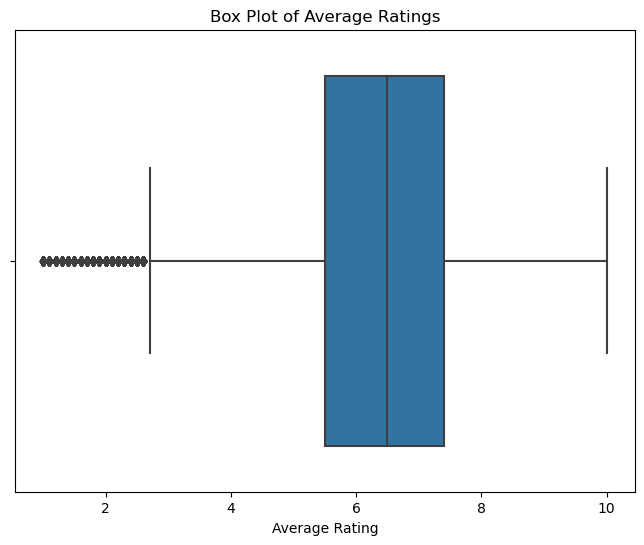

In [130]:
# Box plot for average ratings
plt.figure(figsize=(8, 6))
sns.boxplot(x='averagerating', data=Merging_Dataset)
plt.title('Box Plot of Average Ratings')
plt.xlabel('Average Rating')
plt.show()

In [131]:
#summary of the dataset above giving us the total number of entries, the datatype of every title and also the columns with missing values

data3 = pd.read_csv('title.ratings.csv') 
data3

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


There is a positive corelation between the two; the more popular and highly-rated movies tend to receive a higher number of votes.

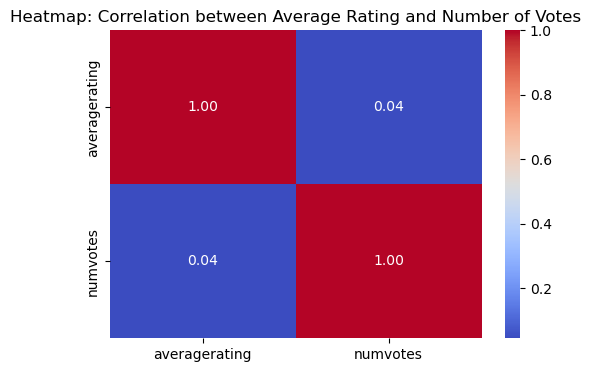

In [132]:
# Heatmap: Correlation between averagerating and numvotes
plt.figure(figsize=(6, 4))
sns.heatmap(data3[['averagerating', 'numvotes']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap: Correlation between Average Rating and Number of Votes')
plt.show()

# I used a heatmap over here to establish the correlation between average rating and number of votes


In the cell below, we have selected the first twenty movies and plotted it against the total gross revenue to see how each movie performed. the marvel Avengers have had the lead and we can see that as we continue through to the right, it has a drop but a maintained one (its not a big drop)

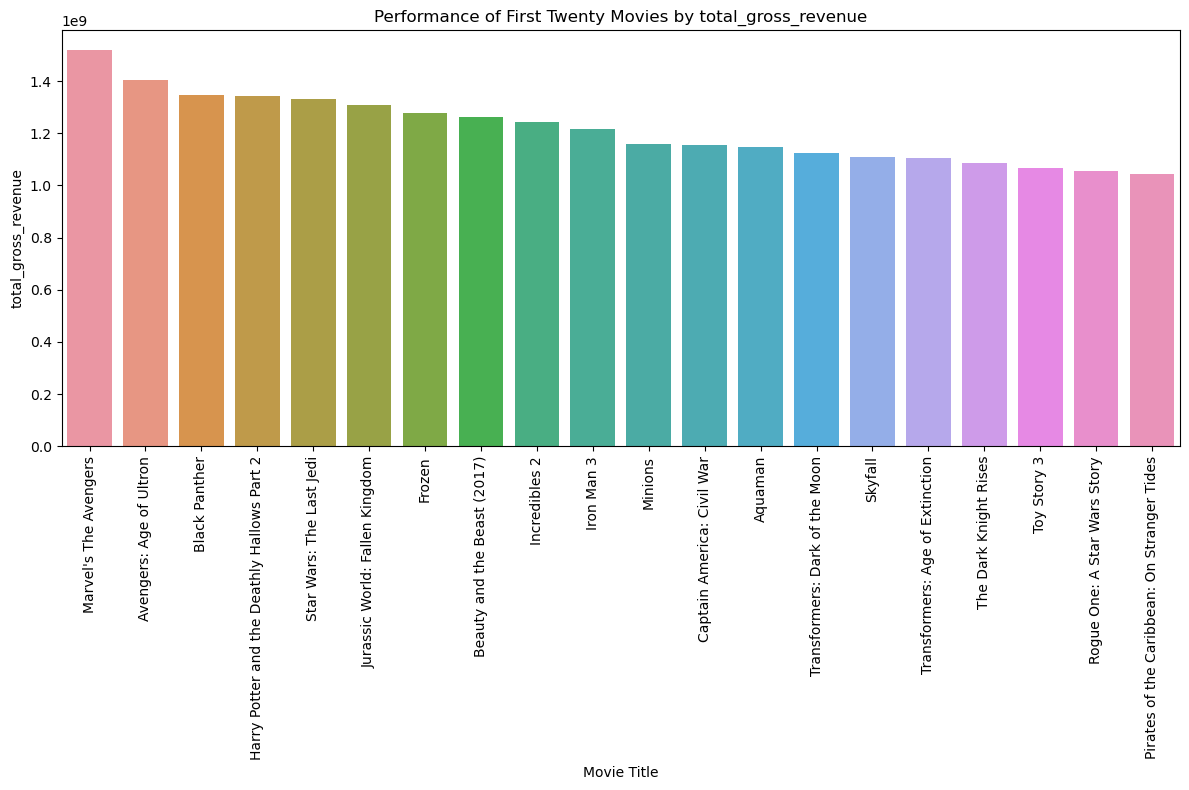

In [141]:

# Sort the DataFrame by 'total_gross_revenue' in descending order to get the first twenty movies
first_twenty_movies = data1.sort_values(by='total_gross_revenue', ascending=False).head(20)

# Data Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='title', y='total_gross_revenue', data=first_twenty_movies)
plt.xticks(rotation=90)
plt.xlabel('Movie Title')
plt.ylabel('total_gross_revenue')
plt.title('Performance of First Twenty Movies by total_gross_revenue')
plt.tight_layout()
plt.show()


## Evaluation
By leveraging these findings, the business can optimize movie production decisions, allocate resources more effectively, and devise revenue generation strategies that capitalize on the best-performing movies.  Ultimately, implementing the model in real-world scenarios holds the potential to significantly boost the business's bottom line and overall success in the competitive entertainment industry. data analysis and visualization provided insights into the movie dataset, such as popular genres and their association with the number of votes. The bar plots helped in understanding the distribution of movie genres and their popularity, which could be useful for making informed decisions.

## Conclusions
Based on the analysis of movie revenue above, several valuable insights have been obtained to guide decision-making in the movie production industry. The analysis explored the distribution of total gross revenue across different movies and years, identifying top-performing movies and revenue trends.
Focus on producing movies with successful revenue trends observed in the analysis, as identified through top-performing movies and studios.
Leverage insights on revenue variations across different years and studios to inform budget allocation and marketing strategies for future movie releases.The most voted genres should be given more attention and also the movies which have high total groos income.
